<a href="https://colab.research.google.com/github/plaban1981/NLP_Recipies/blob/main/Tweet_analysis_using_tweepy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install tweepy


## 1. Get access to the Twitter API

To make any request to the Twitter API (in python or anywhere else) you require your API Key and Access Token. For this, you need to apply for a developer account with Twitter and have your account approved. Once approved, you can create a project and associate it with a sample App. This App will provide you with your API Key and Access Token which you can use to authenticate and use the Twitter API.

#### 1.1 Apply for a developer account with Twitter
To apply for a developer account with Twitter –

Navigate to Twitter’s apply for access page and apply for a developer account.
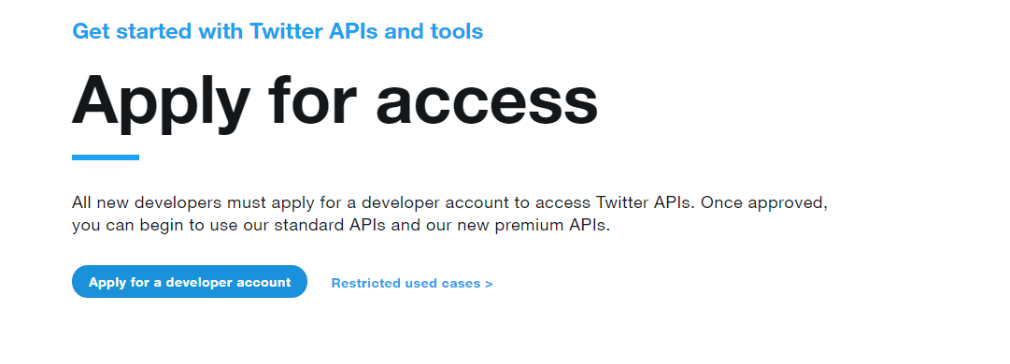

* Login to your account. If you do not have a Twitter account sign up for one.

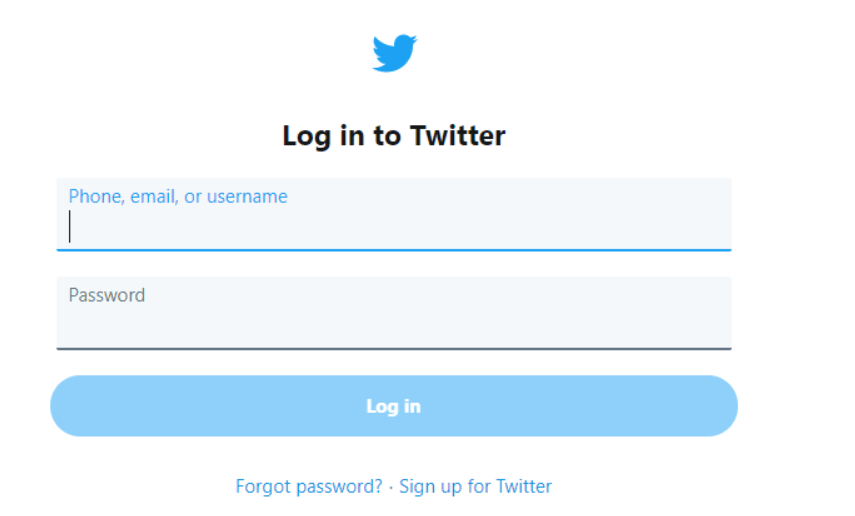

* After logging in you’ll be navigated to a questionnaire on why and how you intend to use the Twitter API. Fill it according to your use-case. If you’re a hobbyist using it to explore the API select Exploring the API under the Hobbyist column.


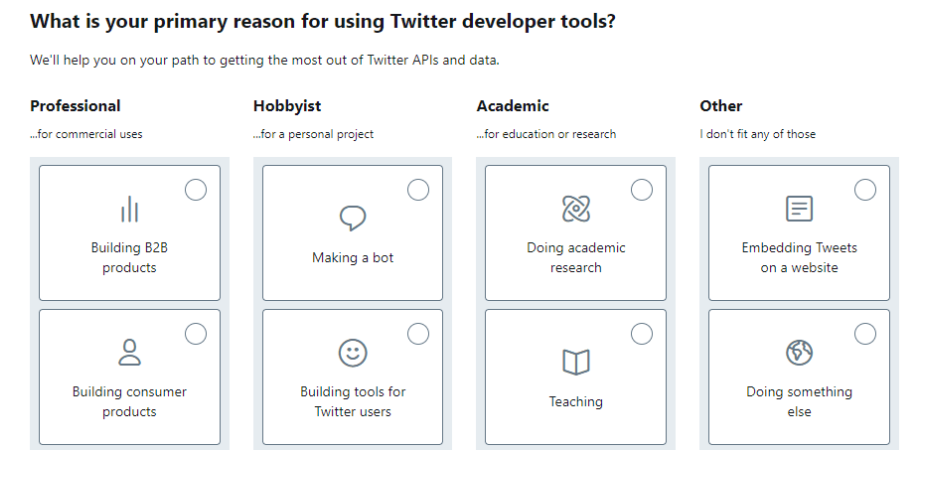


* Answer all the follow-up questions.
* Review the Developer Agreement and Policy and Submit your Application.
* Check your email and click the confirmation link to complete the application process.

#### 1.2 Get your Twitter API Key and Access Token

On clicking the confirmation email we’ll be navigated to the Twitter Developer Platform.

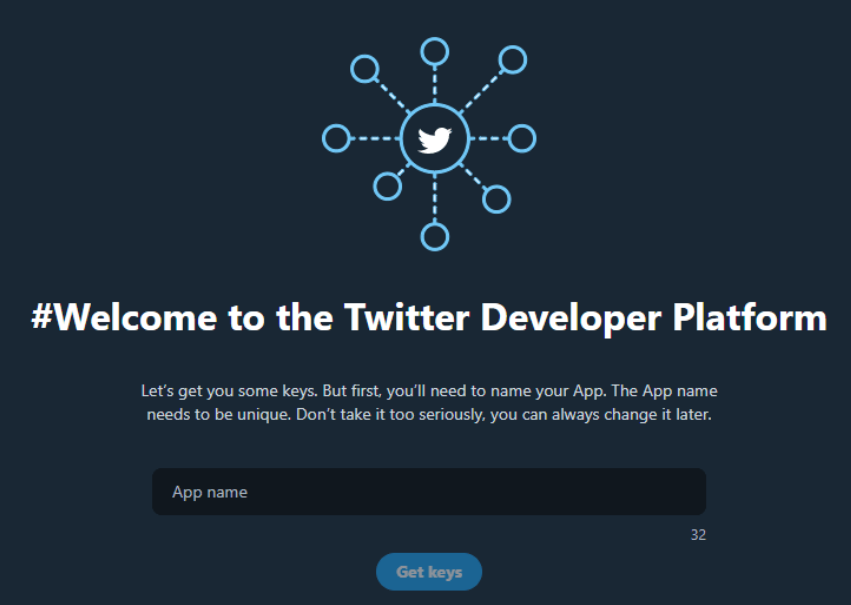

* Give your App a name and click Get keys.
* We’ll be shown your API key and API secret key. Copy and save them securely. You’ll be using them to access the Twitter API.

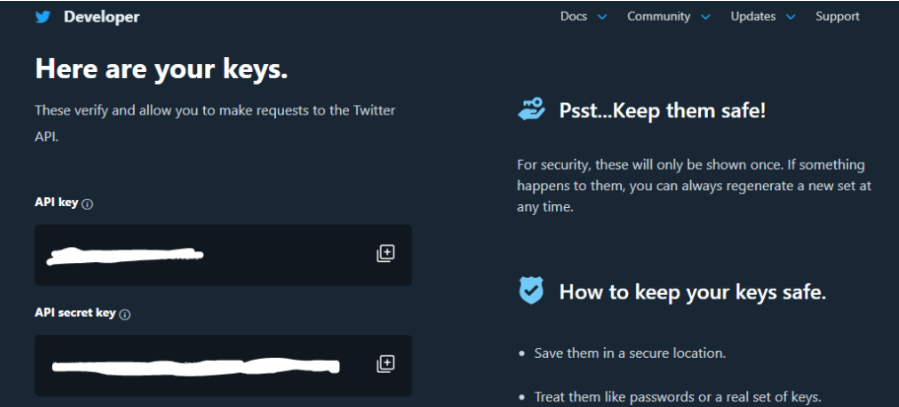

## Install tweepy

In [1]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import the libraries

In [2]:
import numpy as np
import tweepy
import json
import pandas as pd
from tweepy import OAuthHandler

In [18]:
# import tweepy
import tweepy as tw
# your Twitter API key and API secret
my_api_key = "m6IsQi8OXO3k73IXhtgHDFx4x"  ##needs to be replaced with your own api key 
my_api_secret = "oaZq8BIjKchNJRdHt8QtJEwfeCGcvqAEzmETr6spQTgoRpuE6D" ##needs to be replaced with your own api secret key 
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [21]:
# get tweets from the API
search_query = "#covid19 -filter:retweets"
tweets = tw.Cursor(api.search,
              q=search_query,
              lang="en",
              since="2020-09-16").items(50)
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 50


In [23]:
tweets_copy

[Status(_api=<tweepy.api.API object at 0x7fe5cce02110>, _json={'created_at': 'Thu Sep 15 09:36:16 +0000 2022', 'id': 1570345747866091521, 'id_str': '1570345747866091521', 'text': 'The @who Director General @DrTedros believes that the #endisinsight for #covid19 if we keep #running towards the… https://t.co/ArkvbVOr2O', 'truncated': True, 'entities': {'hashtags': [{'text': 'endisinsight', 'indices': [54, 67]}, {'text': 'covid19', 'indices': [72, 80]}, {'text': 'running', 'indices': [92, 100]}], 'symbols': [], 'user_mentions': [{'screen_name': 'WHO', 'name': 'World Health Organization (WHO)', 'id': 14499829, 'id_str': '14499829', 'indices': [4, 8]}, {'screen_name': 'DrTedros', 'name': 'Tedros Adhanom Ghebreyesus', 'id': 189868631, 'id_str': '189868631', 'indices': [26, 35]}], 'urls': [{'url': 'https://t.co/ArkvbVOr2O', 'expanded_url': 'https://twitter.com/i/web/status/1570345747866091521', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [114, 137]}]}, 'metadata': {'iso_language_c

In [24]:
import pandas as pd
# intialize the dataframe
tweets_df = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)
# show the dataframe
tweets_df.head()

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,World Vaccine Congress,London,R & D + Strategic partnering for the global va...,False,2022-09-15 09:36:16,The @who Director General @DrTedros believes t...,"[endisinsight, covid19, running]",Twitter Web App
1,Ahmed,"New York, USA","Bio Science (2022)👨🏻‍🔬🧬, coding+programming, i...",False,2022-09-15 09:35:58,Discussion: \nHave you had any heart problems ...,None,Twitter for iPhone
2,AJ Blackston - Financial IT Solutions Consultant,"Washington, DC",News: #Arbitration #Banking #CyberSecurity #Ed...,False,2022-09-15 09:35:22,"Roll up your sleeve, Florida. Time to update t...",[TodaysMedicalUpdate],Microsoft Power Platform
3,AJ Blackston - Financial IT Solutions Consultant,"Washington, DC",News: #Arbitration #Banking #CyberSecurity #Ed...,False,2022-09-15 09:35:22,Controversial harm reduction strategies appear...,[TodaysMedicalUpdate],Microsoft Power Platform
4,Valurank,"Austin, TX",I am a bot that evaluates articles. If you wan...,False,2022-09-15 09:35:17,Content analysis:\nThis article scores 83/100....,None,Valurank


* Note : All 403 status code errors are related to authentication issues.Go back to my Developer Portal and apply for "Elevated Access".